# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
import scipy.stats as st
import numpy as np

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- **Data Import: Import the dataset into a statistical software tool such as Python or R.**

In [3]:
data=pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- **Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.**

In [4]:
data.drop(columns=['Channel','Region'],axis=1,inplace=True) #Drop columns from dataset

**Explanation:** As we are interested in product categories. 

In [5]:
data.shape

(440, 6)

In [6]:
data.info() #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


**Explanation:** As all the values are non-null so there is no missing values in dataset.

In [7]:
#the above summary shows that all the values are non-null in each column. We can also check in another way like
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Explanation:** its a straightforward approach to depict the null value count and our data is free from null values.

In [8]:
data.duplicated().sum() # check duplicate rows

0

**Explanation:** No duplicate rows found

Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [9]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Explanation:** For the columns where the mean is small compared to the max value indicates the max value is an outlier. Therefore we can detect that our data have some outliers.

- **Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.**

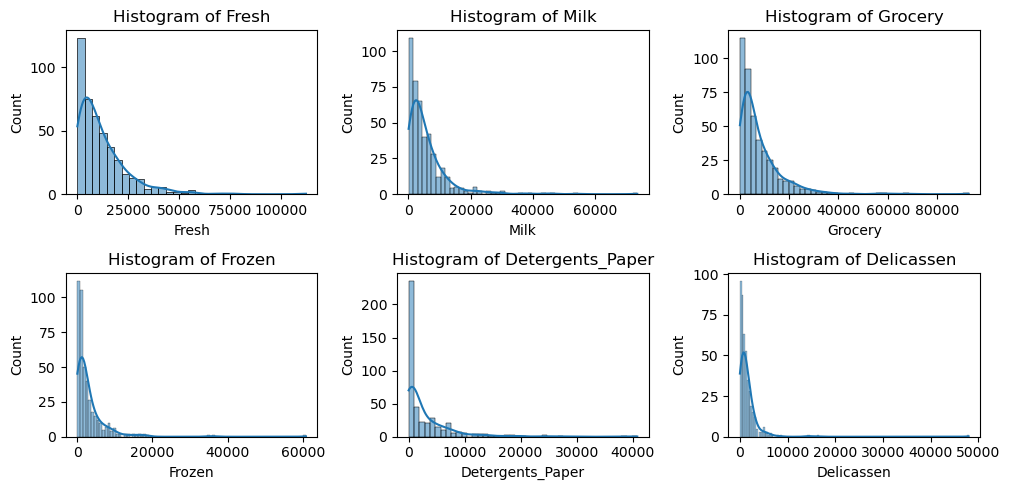

In [10]:
#Histogram

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through column names and create histograms
for row, column in enumerate(data.columns):
    ax = axes[row]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)


# Adjust layout and show
plt.tight_layout()
plt.show()

**Explanation:** we can see that all the distributions are right skewed.

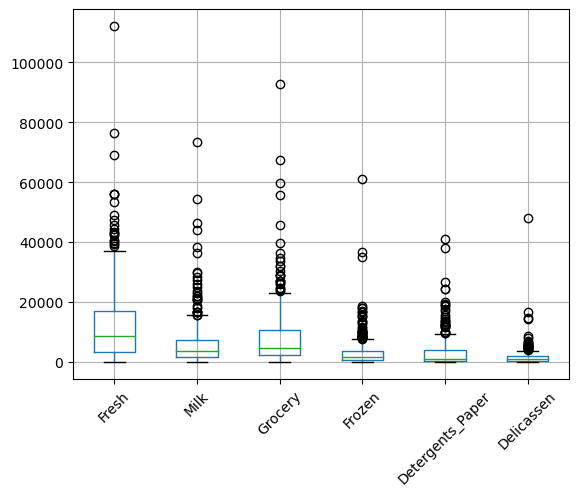

In [11]:
#Boxplot
data.boxplot(rot=45)
plt.show()

**Explanation:** The above box plots shows there are so many outliers in our data. But here the question arises, Are they are really the outliers or we can handle that using some transformations. Lets see...

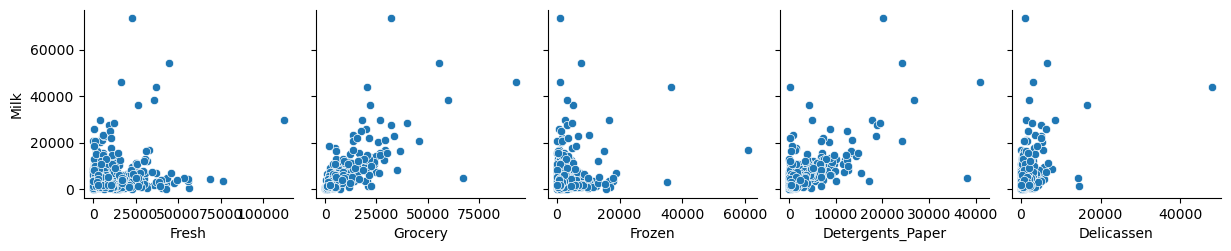

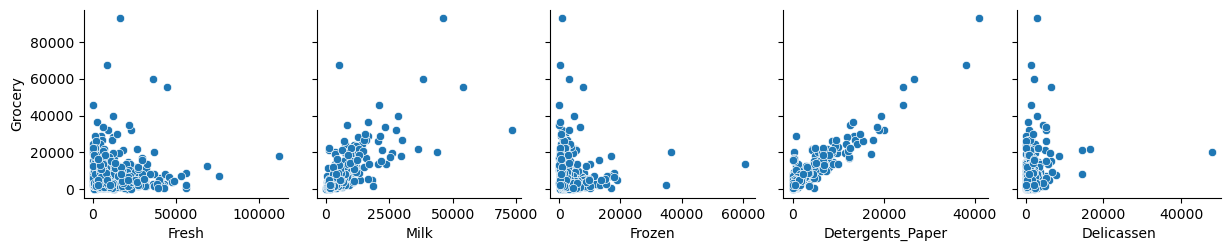

In [12]:
# scatter plots
sns.pairplot(
    data,
    x_vars=["Fresh",  "Grocery","Frozen", "Detergents_Paper",'Delicassen'],
    y_vars=['Milk']
)
sns.pairplot(
    data,
    x_vars=["Fresh",  "Milk","Frozen", "Detergents_Paper",'Delicassen'],
    y_vars=['Grocery']
)
plt.show()

**Explanation:** From the above scatter plot we can depict that
- Milk and Grocery have a really good correlation. so probabally these two are bought together.
- Grocery and Detergent Paper are strongly correlated to each other.

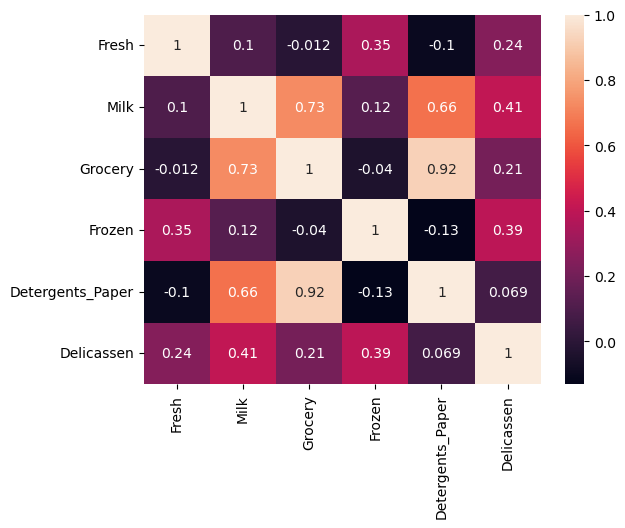

In [13]:
#Heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

**Explanation:** Here also we can see that Grocery and detergents_Papaer are highly correlated with coeff. 0.92

- **Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.**

In [14]:
# For each feature find the data points with extreme high or low values
for feature in data.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data, 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
# Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
4,22615,5410,7198,3915,1777,5185
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
18,18601,6327,10099,2205,2767,3181
...,...,...,...,...,...,...
427,31012,16687,5429,15082,439,1163
432,21117,1162,4754,269,1328,395
434,16731,3922,7994,688,2371,838
435,29703,12051,16027,13135,182,2204


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
28,4113,20484,25957,1158,8604,5206
38,4591,15729,16709,33,6956,433
45,5181,22044,21531,1740,7353,4985
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
9,6006,11093,18881,1159,7425,2098
23,26373,36423,22019,5154,4337,16523
28,4113,20484,25957,1158,8604,5206
38,4591,15729,16709,33,6956,433
43,630,11095,23998,787,9529,72
45,5181,22044,21531,1740,7353,4985
46,3103,14069,21955,1668,6792,1452
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,11314,3090,2062,35009,71,2698
103,56082,3504,8906,18028,1480,2498
125,76237,3473,7102,16538,778,918
181,112151,29627,18148,16745,4948,8550
183,36847,43950,20170,36534,239,47943
196,30624,7209,4897,18711,763,2876
277,9061,829,683,16919,621,139
325,32717,16784,13626,60869,1272,5609
413,4983,4859,6633,17866,912,2435


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,44466,54259,55571,7782,24171,6465
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
92,9198,27472,32034,3232,18906,5130
211,12119,28326,39694,4736,19410,2870
251,6134,23133,33586,6746,18594,5121
312,2137,3737,19172,1274,17120,142


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
183,36847,43950,20170,36534,239,47943


**Explanation:** Here a large fraction of data is being labeled as outliers, they are not really outliers but can be attributed to a wider data distribution. Therefore, we keep these datapoints.

- **Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.**

In [15]:
#correlation matrix
data.corr().apply(pd.to_numeric).style.background_gradient()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**Explanation:** From the above matrix and Heatmap as well we can discover that "Grocery" and "Detergents_Paper" are highly correlated.

- **Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.**

In [16]:
'''Implementing Scaling Using the Standard Scaler Method.
When working with clustering algorithms such as KMeans, 
StandardScaler can be used to ensure that the features are standardized and contribute equally to the analysis.'''

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(data)

scaled_frame = pd.DataFrame(std_scale, columns=data.columns)

scaled_frame.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


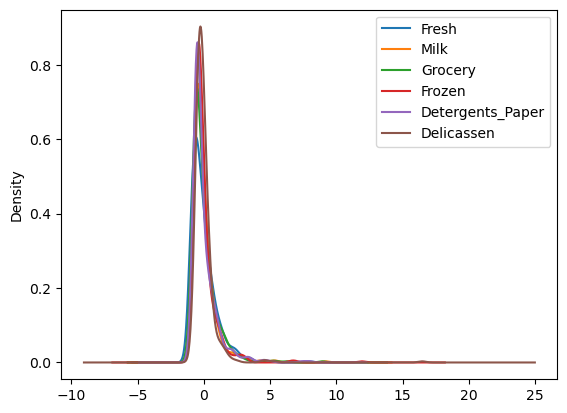

In [17]:
pd.DataFrame(scaled_frame).plot(kind='kde')
plt.show()

**Explanation:** Using the StandardScaler method, we have scaled the data into a uniform unit over all the columns. As you can see in the preceding table, the values of all the features have been converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

- **Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.**

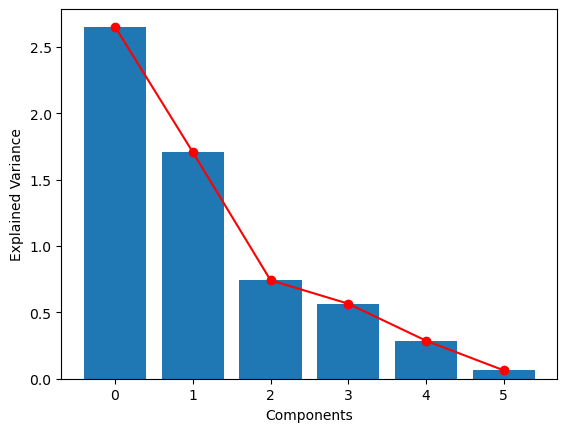

In [18]:
#Feature Selection using PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_frame)
df_pca_all = pca.transform(scaled_frame)
eigenvalues = pca.explained_variance_

#scaled_frame
plt.bar(np.arange(0,scaled_frame.shape[1],1), eigenvalues)
plt.plot(eigenvalues, "r")
plt.plot(eigenvalues, "ro")
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [55]:
#We can drop component having least variance
X = pd.DataFrame(df_pca_all,columns=scaled_frame.columns)
X = X.iloc[:,:-1]
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281
1,0.434420,-0.328413,0.319007,-0.178830,0.365579
2,0.811143,0.815096,1.523416,-1.254082,-0.379054
3,-0.778648,0.652754,0.163012,0.380060,-0.276138
4,0.166287,1.271434,0.066279,-0.826227,-0.394211
...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [20]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans

In [56]:
X_selected=X.to_numpy()

In [57]:
# Fit the model
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_pred_cluster = km.fit_predict(X_selected)


In [58]:
#function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

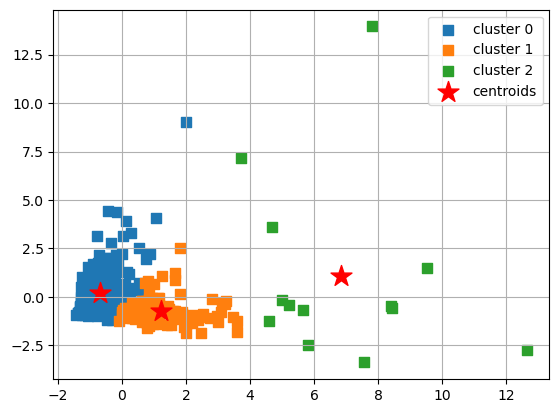

In [59]:
 # plot clustering result
plot_clusters(X_selected, y_pred_cluster, plt_cluster_centers= True)

**Elbow Rule**

In [60]:
#Elbow Rule to find the no of clusters
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

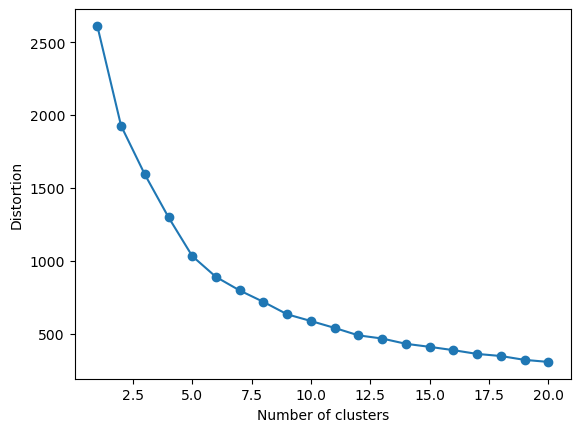

In [61]:
plot_distortion(X,max_clusters=20)

**We can select any no of clusters between 5 to 8**

In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X_selected)
cluster_pred = kmeans.predict(X_selected)
cluster_pred

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 3, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 0, 4, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

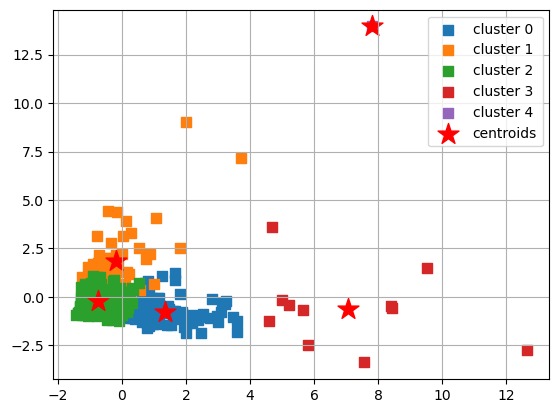

In [63]:
 # plot clustering result
plot_clusters(X_selected, cluster_pred, plt_cluster_centers= True)

In [65]:
# add a new cluster field into new dataframe
X_kmeans=X.copy()
X_kmeans['cluster'] = cluster_pred
X_kmeans['cluster'].value_counts()

2    269
0     96
1     63
3     11
4      1
Name: cluster, dtype: int64

In [110]:
#consider absolute values
bar=np.abs(X_kmeans.drop(columns=['cluster']))

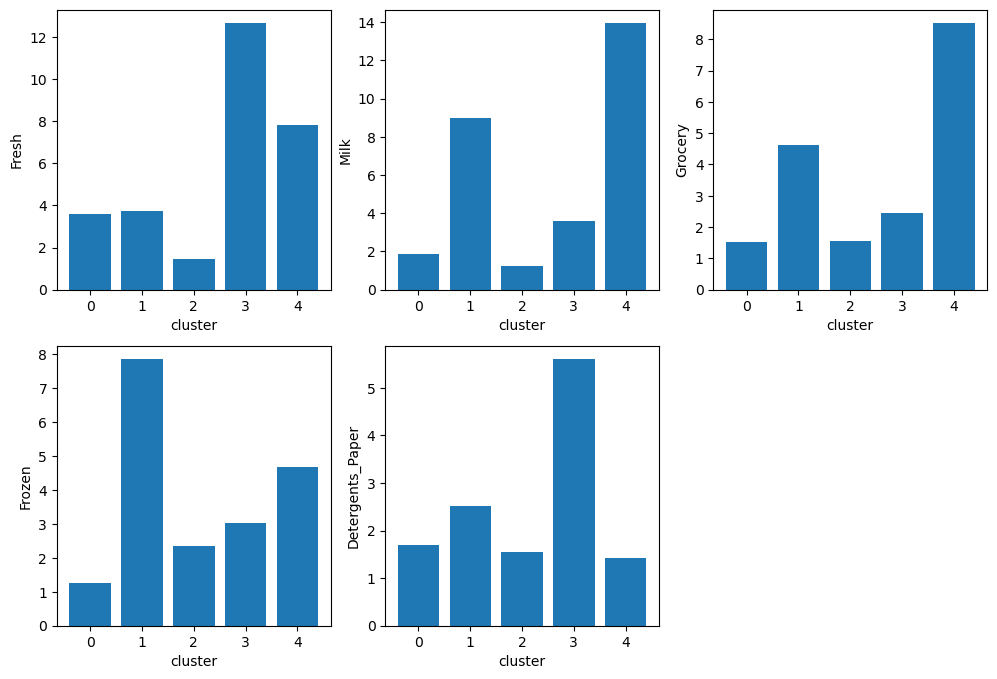

In [111]:
#plot clusters
i=1
plt.figure(figsize=(12,8))
for col in bar.columns:
    plt.subplot(2,3,i,)
    plt.bar(X_kmeans['cluster'],bar[col])
    plt.xlabel('cluster')
    plt.ylabel(col)
    i=i+1
plt.show()

**Explanation:** 
- Cluster 0: Cluster with all product sales according to the average
- Cluster 1: Cluster with quite high sales of Frozen products, while sales of Fresh,Milk, Grocery, Detegents_Paper products are normal
- Cluster 2: Cluster with sales of Fresh and Milk products are quite low, and sales of Grocery,Frozen and Detergents_Paper products are so-so
- Cluster 3: Cluster with very high sales of Fresh and Detergents_Paper products, although sales of Milk, Grocery, Frozen products are quite normal
- Cluster 4: Cluster with quite high sales of Milk and Grocery as compare to other products

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [52]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

In [53]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

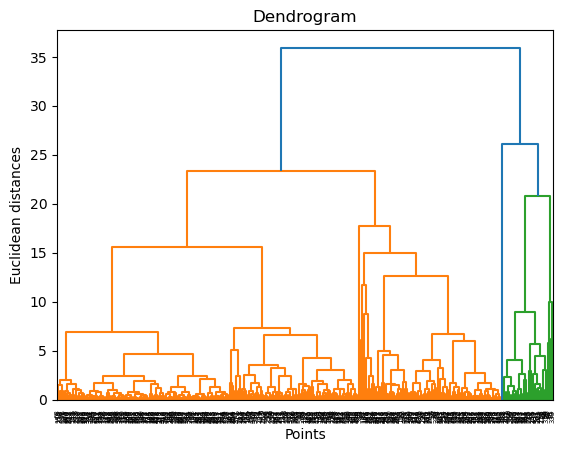

In [66]:
plot_dendrogram(X_selected)

In [68]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters =3)
y_hc = ac.fit_predict(X_selected)

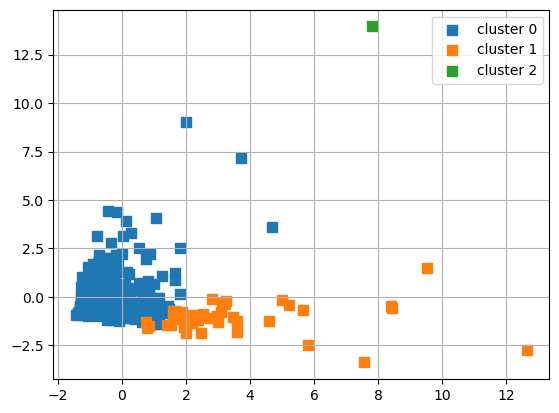

In [69]:
plot_clusters(X_selected,y_hc)

In [113]:
# add a new cluster field into new dataframe
X_hc=X.copy()
X_hc['cluster'] = y_hc
X_hc['cluster'].value_counts()

0    394
1     45
2      1
Name: cluster, dtype: int64

In [115]:
#consider absolute values
bar_h=np.abs(X_hc.drop(columns=['cluster']))

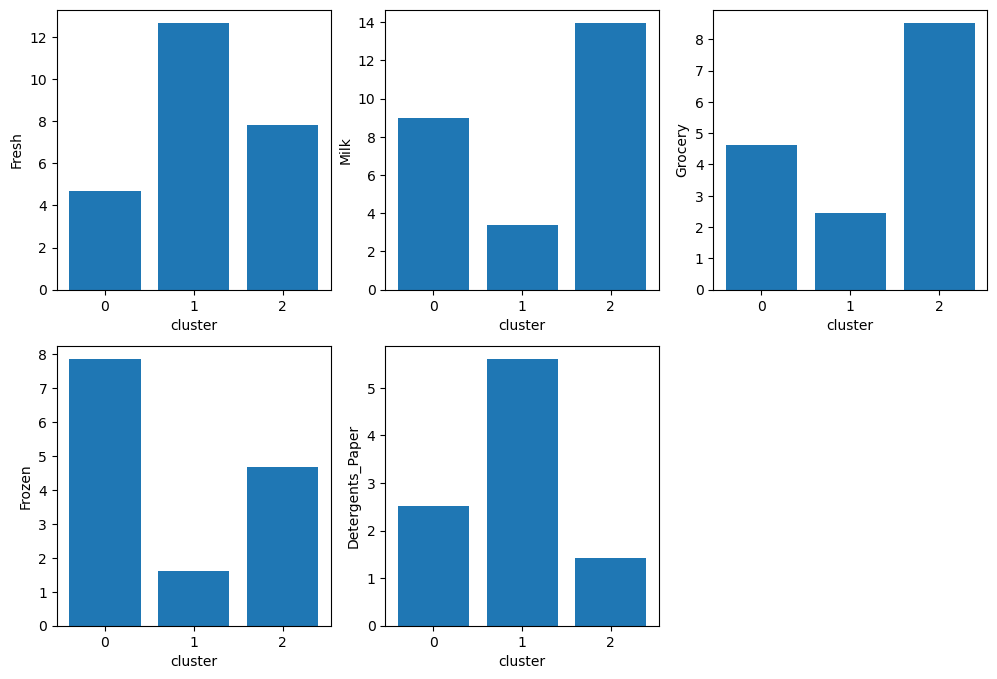

In [116]:
i=1
plt.figure(figsize=(12,8))
for col in bar.columns:
    plt.subplot(2,3,i,)
    plt.bar(X_hc['cluster'],bar_h[col])
    plt.xlabel('cluster')
    plt.ylabel(col)
    i=i+1
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [77]:
pca1 = PCA(n_components=None)

dfx_pca = pca1.fit(X_selected)

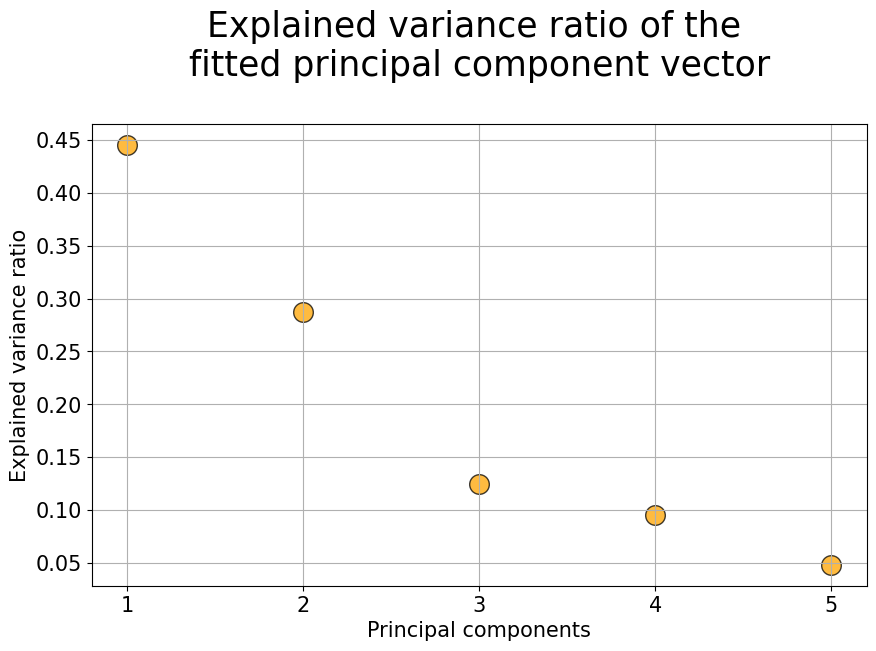

In [78]:

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [79]:
pca1.explained_variance_ratio_

array([0.44550458, 0.28677374, 0.12465238, 0.09495157, 0.04811773])

**Explanation:** From the above output, we can observe that the principal component 1 holds 44.55% of the information while the principal component 2 holds only 28.67% , 3 holds 12.46% and 4 holds 9.4% and 5 holds 4.8%of the information.

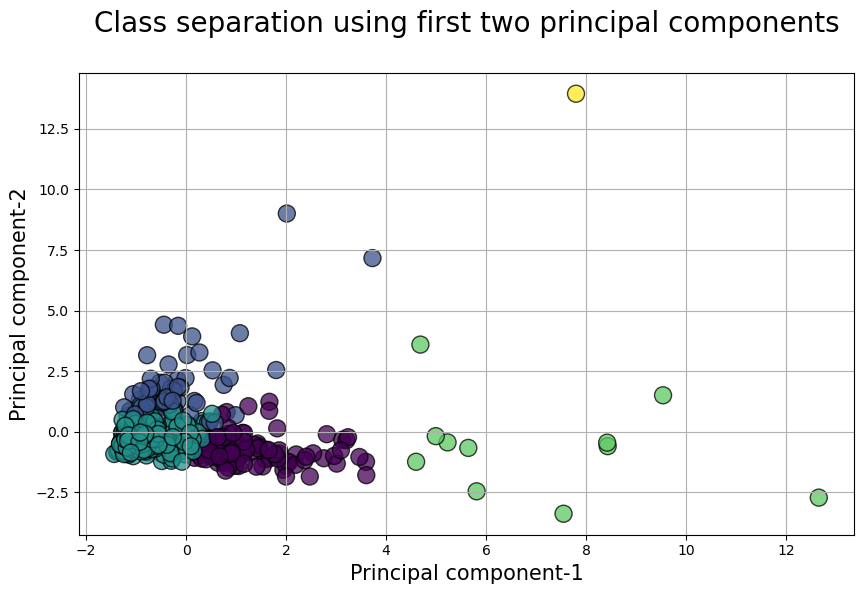

In [92]:
pca = PCA(n_components=2)

dfx_pca = pca.fit(X_selected)
dfx_trans_2 = pca.transform(X_selected)
dfx_trans = pd.DataFrame(data=dfx_trans_2)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=X_kmeans['cluster'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# - Evaluation

In [ ]:
# Calculate Silhouette Coefficient

In [121]:
#KMeans
from sklearn.metrics import silhouette_score

sil_coeff = silhouette_score(X_kmeans.drop("cluster", axis=1), X_kmeans["cluster"])
print("KMeans Silhouette Coefficient:", round(sil_coeff, 3))

KMeans Silhouette Coefficient: 0.373


In [122]:
# Hierarchical
from sklearn.metrics import silhouette_score

sil_coeff = silhouette_score(X_hc.drop("cluster", axis=1), X_hc["cluster"])
print("Hierarchical Silhouette Coefficient:", round(sil_coeff, 3))

Hierarchical Silhouette Coefficient: 0.52


**Explanation:** We can see that our segmentation above has a positive Silhouette Coefficient, which means there is the degree of separation between the clusters, although some overlapping still happens. But the 'Hierarchical' Clustering gives the better separation in segments as compare to KMeans.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Milk and Grocery have a really good correlation. so probabally these two are bought together.
- Grocery and Detergent Paper are strongly correlated to each other.
- Cluster 1 defines the normal sale for all the customers.
- Cluster 4 is based on the high sale of Milk and Grocery.
 